In [1]:
print("Advanced Computer Vision and Video Analytics_IntroLab_Harish_Sivakumar_E22CSEU0033")
# Experiments for Lab- 9.1.2025
# 1. Perform following for retrieving information from Image. (Image Transformation)
# a. Rotation
# b. Scaling
# c. Cropping
# 2. Understand MNIST dataset and apply SVM.
# Take 80-20 splits for 2 experiment

Advanced Computer Vision and Video Analytics_IntroLab_Harish_Sivakumar_E22CSEU0033


In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#print(x_train[0])
#Normalization of Data
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train.shape, x_test.shape, y_train.shape, y_test.shape
#x shape --> 3D(sample, height, width)
#y shape 1D --> Target variable for classification --> Class labels (0-9 digits in this case)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [3]:
#x_train[0]

In [4]:
import numpy as np
# adds a channel dimension(1 channel: grayscale, 3: RGB, 4:RGBA(alpa), etc)
x_train = np.expand_dims(x_train, axis=-1)  # Shape: (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)    # Shape: (10000, 28, 28, 1) #add the new dimension as the last axis (axis=-1)
x_train.shape, x_test.shape
#4D(samples, height, width, channel number)

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
# Rotation
rotations = tf.image.rot90(x_train, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)) #Rotates an image by 90 degrees counterclockwise.
#Number of 90 deg rotation specified by k value
#shape[]:  Specifies that a single random value is generated
'''
k=0: No rotation
k=1: 90 degrees counterclockwise
k=2: 180 degrees counterclockwise
k=3: 270 degrees counterclockwise
k=4: 360 degrees counterclockwise(equavavlent to k=0)
'''
#tf.int32: Ensures the generated random number is an integer.
#TensorFlow will raise an error(if int32 not given) because it cannot generate an integer with floating-point
# Scaling
#resized smaller, 80% of the original size. resized larger, 120% of the original size. --> Randomly in between these values
scale_factor = tf.random.uniform([], 0.8, 1.2)  # Random scale factor
#tf.image.resize(rotations, [new_height, new_width]) resizes the input image (rotations) to the new height and width.
scaled = tf.image.resize(rotations, [int(28 * scale_factor), int(28 * scale_factor)])
# ensures that the resized image is padded(process of adding extra pixels) or cropped back to the original dimensions of 28x28.
scaled = tf.image.resize_with_crop_or_pad(scaled, 28, 28)

# Cropping
#retrieves the shape of the scaled tensor (the resized image).
#tf.shape returns in form of batch_size,height,weight,channel_number
scaled_shape = tf.shape(scaled)
#size of the square crop to be taken from the image.
#scaled_shape[1] --> height, scaled_shape[2] --> width
#finds the smaller dimension between height and width to ensure the crop can fit within the image.
crop_size = tf.minimum(scaled_shape[1], scaled_shape[2])
#extracts a random square crop(The height and width) from each image (thats why crop_size written twice)
cropped = tf.image.random_crop(scaled, size=[scaled_shape[0], crop_size, crop_size, scaled_shape[3]])
#all images are resized to the target size of 28x28
cropped_resized = tf.image.resize_with_crop_or_pad(cropped, 28, 28)

x_train_aug = cropped_resized #augmented data
x_train_aug.shape, x_train.shape

(TensorShape([60000, 28, 28, 1]), (60000, 28, 28, 1))

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#automatically determine the size of this dimension so that the total number of elements remains the same(thats why -1 to 28x28)
x_train_aug = np.reshape(cropped_resized, (-1, 28*28))  # Flatten to (n_samples, 784)

x_train_final, x_test_final, y_train_final, y_test_final = train_test_split(x_train_aug, y_train, test_size=0.2, random_state=42)

#SVM
svm_model = SVC(kernel='rbf')
svm_model.fit(x_train_final, y_train_final)
y_pred = svm_model.predict(x_test_final)


In [7]:
accuracy = accuracy_score(y_test_final, y_pred) # Accuracy
report = classification_report(y_test_final, y_pred)# Classification report (Precision, Recall, F1-score)
conf_matrix = confusion_matrix(y_test_final, y_pred)# Confusion Matrix

print("Accuracy: ",accuracy)
print("Classification Report: \n",report)
print("Confusion Matrix: \n",conf_matrix)

#Accuracy = No. of True Positives/Total elements
#Precesion = TP/(TP+FP)
#Recall = TP/(TP/FN)
#F1 Score = (2*(P*R))/(P+R)

#CM
# TP FN | ++ +-
# FP TN | -+ --

Accuracy:  0.978
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1175
           1       0.99      0.99      0.99      1322
           2       0.96      0.98      0.97      1174
           3       0.98      0.96      0.97      1219
           4       0.97      0.98      0.97      1176
           5       0.98      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.98      0.97      0.98      1299
           8       0.97      0.97      0.97      1160
           9       0.97      0.97      0.97      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000

Confusion Matrix: 
 [[1163    0    3    0    2    3    1    0    2    1]
 [   0 1309    6    2    1    0    0    0    1    3]
 [   1    4 1149    2    5    1    0    7    4    1]
 [   1    0   14 116

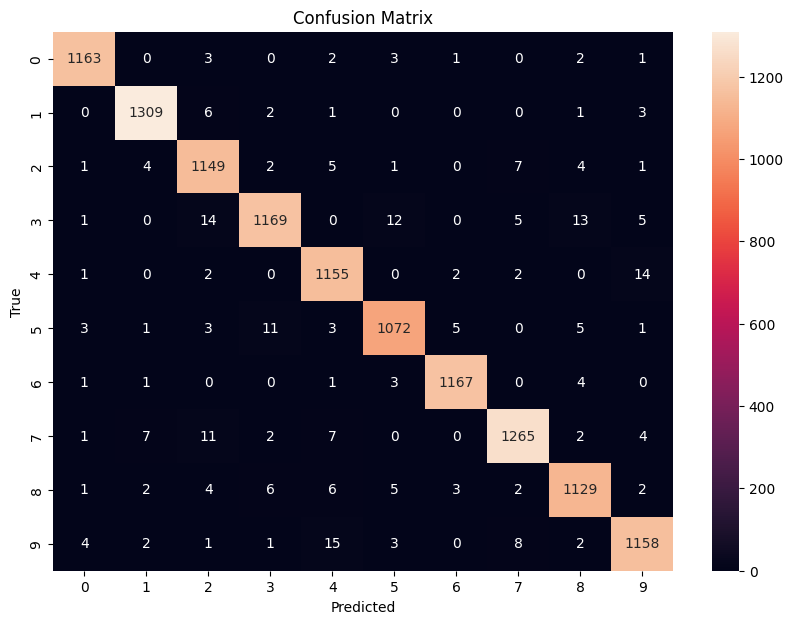

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

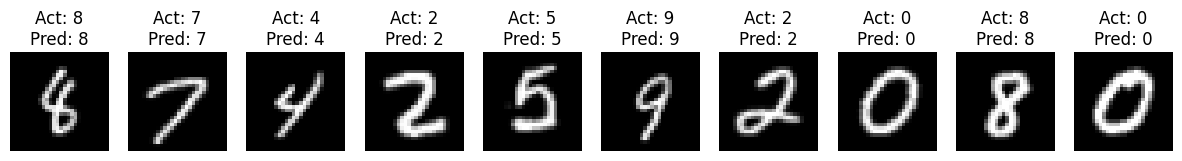

In [9]:
import matplotlib.pyplot as plt
import numpy as np
n = 10
indices = np.random.choice(len(x_test_final), n, replace=False)

plt.figure(figsize=(15, 15))

for i, idx in enumerate(indices):
    plt.subplot(1, n, i + 1)
    plt.imshow(x_test_final[idx].reshape(28, 28), cmap='gray')  # Reshape to 28x28 for MNIST digit
    plt.title(f'Act: {y_test_final[idx]}\nPred: {y_pred[idx]}')
    plt.axis('off')

plt.show()
